In [ ]:
!pip install pgmpy
!pip install bnlearn


In [ ]:
pip uninstall matplotlib

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3


In [ ]:
pip install matplotlib==3.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 7.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import bnlearn as bn
import torch
import numpy as np
from pgmpy.models import BayesianModel
#from pgmpy.estimators import ConstraintBasedEstimator
from pgmpy.estimators import PC, HillClimbSearch
from pgmpy.estimators import MaximumLikelihoodEstimator, ExhaustiveSearch, BicScore , BDeuScore, K2Score
#from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.metrics import log_likelihood_score,structure_score
from pgmpy.independencies import Independencies

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on the GPU")
else:
    device = torch.device("cpu")
    print("running on the CPU")



running on the GPU


In [ ]:

title = "age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target"

title = title.split(",")

data_train = pd.read_csv(r"/content/drive/MyDrive/AAI docs/heart-data-discretized-train.csv", names=title)
data_test = pd.read_csv(r"/content/drive/MyDrive/AAI docs/heart-data-discretized-test.csv", names=title)

data_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,2,1,0,1,0,0,1,3,0,0,2,2,3,0
2,2,1,0,2,0,1,0,3,1,2,0,0,3,0
3,4,1,0,2,0,0,1,2,1,2,0,0,3,0
4,3,1,0,2,0,0,1,3,0,0,2,1,3,0


In [ ]:
model = BayesianModel([('target','thalach'),('target','trestbps'), ('target','cp'),('target','thal'),('target','exang'),('target','ca'),('target','slope'),('target','restecg'),('target','chol'),('target','age'),
                       ('fbs','ca'),('fbs','exang'),('fbs','age'),
                       ('age','trestbps'),('age','exang'),
                       ('chol','trestbps'),('chol','slope'),('chol','sex'),('chol','restecg'),
                       ('restecg','age'),('restecg','slope'),('restecg','sex'),
                       ('sex','exang'),
                       ('slope','age'),('slope','cp'),('slope','oldpeak'),('slope','sex'),
                       ('thal','fbs'),('thal','age'),
                       ('oldpeak','ca'),('oldpeak','trestbps'),
                       ('cp','trestbps'),
                       ('thalach','slope'), ('thalach','ca'), ('thalach','thal'), ('thalach','exang'),('thalach','oldpeak'),('thalach','trestbps')])





In [ ]:
model.fit(data_train, estimator=MaximumLikelihoodEstimator)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

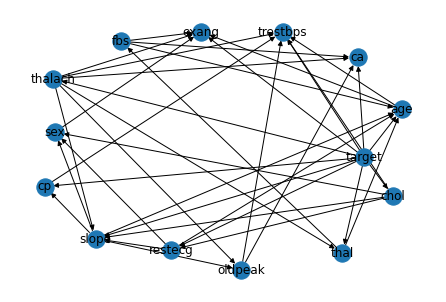

In [ ]:
nx.draw(model, with_labels=True)
plt.show()

In [ ]:
bic = BicScore(data_train)
bdeu = BDeuScore(data_train, equivalent_sample_size=5)
k2 = K2Score(data_train)

In [ ]:
model.nodes()
model.get_independencies()

(restecg ⟂ thal, thalach, fbs | target)
(restecg ⟂ fbs | thal)
(restecg ⟂ thal, thalach, fbs | chol, target)
(restecg ⟂ fbs | thal, chol)
(restecg ⟂ oldpeak | thalach, slope)
(restecg ⟂ thal, fbs | thalach, target)
(restecg ⟂ fbs | thal, thalach)
(restecg ⟂ cp | slope, target)
(restecg ⟂ fbs | thal, slope)
(restecg ⟂ fbs | thal, oldpeak)
(restecg ⟂ fbs | thal, cp)
(restecg ⟂ thalach, fbs | thal, target)
(restecg ⟂ thal, thalach | fbs, target)
(restecg ⟂ fbs | thal, sex)
(restecg ⟂ oldpeak | chol, thalach, slope)
(restecg ⟂ thal, fbs | chol, thalach, target)
(restecg ⟂ fbs | thal, chol, thalach)
(restecg ⟂ cp | chol, slope, target)
(restecg ⟂ fbs | thal, chol, slope)
(restecg ⟂ fbs | thal, chol, oldpeak)
(restecg ⟂ fbs | thal, chol, cp)
(restecg ⟂ thalach, fbs | thal, chol, target)
(restecg ⟂ thal, thalach | chol, fbs, target)
(restecg ⟂ fbs | thal, chol, sex)
(restecg ⟂ oldpeak | thalach, slope, age)
(restecg ⟂ oldpeak | exang, thalach, slope)
(restecg ⟂ oldpeak | thalach, slope, cp)
(

In [ ]:
print(log_likelihood_score(model, data_train))
print(structure_score(model, data_train, scoring_method="bic"))

-8132.980804447206
-363966.8644769861


In [ ]:
model.edges()

OutEdgeView([('target', 'thalach'), ('target', 'trestbps'), ('target', 'cp'), ('target', 'thal'), ('target', 'exang'), ('target', 'ca'), ('target', 'slope'), ('target', 'restecg'), ('target', 'chol'), ('target', 'age'), ('thalach', 'slope'), ('thalach', 'ca'), ('thalach', 'thal'), ('thalach', 'exang'), ('thalach', 'oldpeak'), ('thalach', 'trestbps'), ('cp', 'trestbps'), ('thal', 'fbs'), ('thal', 'age'), ('slope', 'age'), ('slope', 'cp'), ('slope', 'oldpeak'), ('slope', 'sex'), ('restecg', 'age'), ('restecg', 'slope'), ('restecg', 'sex'), ('chol', 'trestbps'), ('chol', 'slope'), ('chol', 'sex'), ('chol', 'restecg'), ('age', 'trestbps'), ('age', 'exang'), ('fbs', 'ca'), ('fbs', 'exang'), ('fbs', 'age'), ('sex', 'exang'), ('oldpeak', 'ca'), ('oldpeak', 'trestbps')])

In [ ]:
model.get_immoralities

In [ ]:
model.get_immoralities()

In [ ]:
model.fit(data_train)

In [ ]:
est = PC(data_train)

In [ ]:
skel, seperating_sets = est.build_skeleton(significance_level=0.01)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
print("Undirected edges: ", skel.edges())

Undirected edges:  [('age', 'sex'), ('age', 'cp'), ('age', 'trestbps'), ('age', 'chol'), ('age', 'thalach'), ('age', 'oldpeak'), ('age', 'ca'), ('age', 'thal'), ('age', 'target'), ('sex', 'chol'), ('sex', 'thalach'), ('sex', 'ca'), ('sex', 'thal'), ('cp', 'trestbps'), ('cp', 'thalach'), ('cp', 'exang'), ('cp', 'oldpeak'), ('cp', 'slope'), ('cp', 'ca'), ('cp', 'thal'), ('cp', 'target'), ('trestbps', 'chol'), ('trestbps', 'restecg'), ('trestbps', 'thalach'), ('trestbps', 'exang'), ('trestbps', 'oldpeak'), ('trestbps', 'ca'), ('trestbps', 'thal'), ('chol', 'restecg'), ('chol', 'thalach'), ('chol', 'ca'), ('chol', 'thal'), ('fbs', 'ca'), ('restecg', 'ca'), ('thalach', 'exang'), ('thalach', 'oldpeak'), ('thalach', 'slope'), ('thalach', 'ca'), ('thalach', 'thal'), ('oldpeak', 'slope'), ('oldpeak', 'ca'), ('oldpeak', 'thal'), ('slope', 'ca'), ('slope', 'thal'), ('ca', 'target'), ('thal', 'target')]


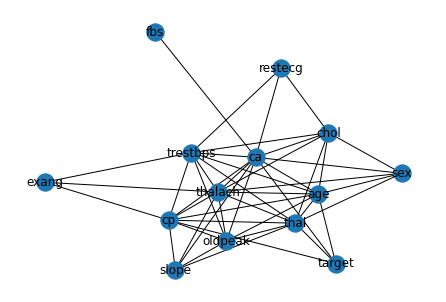

In [ ]:
nx.draw(skel, with_labels=True)
plt.show()

In [ ]:
pdag = est.skeleton_to_pdag(skel, seperating_sets)
print("PDAG edges:       ", pdag.edges())

PDAG edges:        [('exang', 'cp'), ('exang', 'thalach'), ('exang', 'trestbps'), ('cp', 'oldpeak'), ('cp', 'thalach'), ('slope', 'oldpeak'), ('slope', 'cp'), ('slope', 'thalach'), ('oldpeak', 'thalach'), ('oldpeak', 'trestbps'), ('restecg', 'chol'), ('restecg', 'trestbps'), ('restecg', 'ca'), ('target', 'cp'), ('target', 'age'), ('target', 'ca'), ('target', 'thal'), ('sex', 'age'), ('sex', 'chol'), ('sex', 'thalach'), ('thal', 'thalach'), ('fbs', 'ca')]


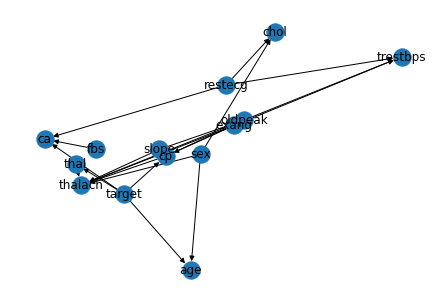

In [ ]:
nx.draw(pdag, with_labels=True)
plt.show()

In [ ]:
model = pdag.to_dag()
print("DAG edges:        ", model.edges())

DAG edges:         [('exang', 'cp'), ('exang', 'thalach'), ('exang', 'trestbps'), ('cp', 'oldpeak'), ('cp', 'thalach'), ('slope', 'oldpeak'), ('slope', 'cp'), ('slope', 'thalach'), ('oldpeak', 'thalach'), ('oldpeak', 'trestbps'), ('restecg', 'chol'), ('restecg', 'trestbps'), ('restecg', 'ca'), ('target', 'cp'), ('target', 'age'), ('target', 'ca'), ('target', 'thal'), ('sex', 'age'), ('sex', 'chol'), ('sex', 'thalach'), ('thal', 'thalach'), ('fbs', 'ca')]


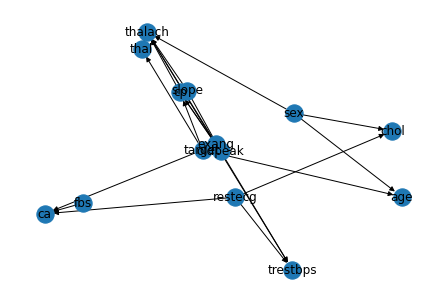

In [ ]:
nx.draw(pdag, with_labels=True)
plt.show()

In [ ]:
model.edges()

OutEdgeView([('exang', 'cp'), ('exang', 'thalach'), ('exang', 'trestbps'), ('cp', 'oldpeak'), ('cp', 'thalach'), ('slope', 'oldpeak'), ('slope', 'cp'), ('slope', 'thalach'), ('oldpeak', 'thalach'), ('oldpeak', 'trestbps'), ('restecg', 'chol'), ('restecg', 'trestbps'), ('restecg', 'ca'), ('target', 'cp'), ('target', 'age'), ('target', 'ca'), ('target', 'thal'), ('sex', 'age'), ('sex', 'chol'), ('sex', 'thalach'), ('thal', 'thalach'), ('fbs', 'ca')])

In [ ]:
# use hill climb search to orient the edges:
hc = HillClimbSearch(data_train)
model = hc.estimate(tabu_length=10, white_list=model.edges(), scoring_method=BDeuScore(data_train))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [ ]:
model.edges()

OutEdgeView([('age', 'ever_married'), ('age', 'hypertension'), ('work_type', 'age'), ('work_type', 'smoking_status'), ('avg_glucose_level', 'bmi'), ('bmi', 'hypertension'), ('stroke', 'age')])

In [ ]:
from pgmpy.estimators import HillClimbSearch
hc = HillClimbSearch(data_train)
best_model = hc.estimate(scoring_method=BicScore(data_train))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('sex', 'thal'), ('cp', 'exang'), ('oldpeak', 'slope'), ('slope', 'thalach'), ('ca', 'age'), ('thal', 'target'), ('target', 'cp'), ('target', 'ca'), ('target', 'oldpeak'), ('target', 'restecg')]


In [ ]:
print(best_model.edges())

[('sex', 'thal'), ('cp', 'exang'), ('oldpeak', 'slope'), ('slope', 'thalach'), ('ca', 'age'), ('thal', 'target'), ('target', 'cp'), ('target', 'ca'), ('target', 'oldpeak'), ('target', 'restecg')]


In [ ]:
new_model = BayesianModel(best_model.edges())

In [ ]:
new_model.edges()

OutEdgeView([('sex', 'thal'), ('thal', 'target'), ('cp', 'exang'), ('oldpeak', 'slope'), ('slope', 'thalach'), ('ca', 'age'), ('target', 'cp'), ('target', 'ca'), ('target', 'oldpeak'), ('target', 'restecg')])

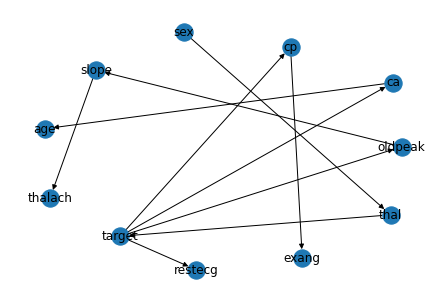

In [ ]:
nx.draw(new_model, with_labels=True)
plt.show()

In [ ]:
new_model.fit(data_train, estimator=MaximumLikelihoodEstimator)

In [ ]:
new_model.nodes()

NodeView(('sex', 'thal', 'cp', 'exang', 'oldpeak', 'slope', 'thalach', 'ca', 'age', 'target', 'restecg'))

In [ ]:
data_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data_train_new = data_train.drop(['trestbps','chol','fbs'], axis=1)

In [ ]:
print(log_likelihood_score(new_model, data_train_new))
print(structure_score(new_model, data_train_new, scoring_method="bic"))

-7646.592055041132
-8159.292023040325


In [ ]:
data_test_copy = data_test.drop(['trestbps','chol','fbs'], axis=1)


In [ ]:
data_test_copy.drop('target', axis=1, inplace=True)

In [ ]:
data_test_copy.head()

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal
0,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal
1,3,1,0,2,2,0,3,0,3,1
2,1,1,0,0,2,0,0,2,0,3
3,0,0,1,1,4,0,0,2,0,2
4,3,0,0,0,2,1,0,1,0,3


In [ ]:
new_model.nodes()

NodeView(('sex', 'thal', 'cp', 'exang', 'oldpeak', 'slope', 'thalach', 'ca', 'age', 'target', 'restecg'))

In [ ]:
data_test_copy.columns

Index(['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')

In [ ]:
Y_pred = new_model.predict(data_test_copy)

  0%|          | 0/153 [00:00<?, ?it/s]

In [ ]:
Y_prob = new_model.predict_probability(data_test_copy)

In [ ]:
Y_prob

In [ ]:
Y_true=data_test['target']

In [ ]:
Y_prob_np = Y_prob.to_numpy()

In [ ]:
Y_prob_new = []
for i in range(1, len(Y_true)):
  true = int(Y_true[i])
  print(i,true)
  x = Y_prob_np[i][true]
  Y_prob_new.append(x)


In [ ]:
Y_true_new = Y_true.iloc[1:]

In [ ]:
P = np.asarray(Y_true_new.shape)+0.00001 # constant to avoid NAN in KL divergence
Q = np.asarray(Y_prob)+0.00001

In [ ]:
P

array([960.00001])

In [ ]:
from sklearn import metrics
acc = metrics.balanced_accuracy_score(Y_true, Y_pred)
fpr, tpr, _ = metrics.roc_curve(Y_true_new, Y_prob_new, pos_label=1)
auc = metrics.auc(fpr, tpr)
brier = metrics.brier_score_loss(Y_true_new, Y_prob_new)
kl_div = np.sum(P*np.log(P/Q))

In [ ]:
print("PERFORMANCE:")
print("Balanced Accuracy="+str(acc))
print("Area Under Curve="+str(auc))
print("Brier Score="+str(brier))
print("KL Divergence="+str(kl_div))
#print("training Time="+str(self.training_time)+" secs.")
#print("Inference Time="+str(self.inference_time)+" secs.")